<center> <img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="600" height="200" />

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> Ana Sofía Durrmuller Acosta y Gerardo González Flores </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Febrero 2023 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/gerardogonz/Lab1-MSYT'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Some interesting title for your work  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Se busca comparar los resultados de dos estrategias de inversión (pasiva y activa) de un ETF con un capital de 1 millon de pesos para tomar una decisión y decidir ¿Con qué estrategia generamos más ganancias?  </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

En este estudio se implementaron dos estrategias de inversión, una pasiva y otra activa, con el objetivo de comparar sus resultados y determinar la mejor opción para un inversionista con un capital inicial de 1.000.000 de pesos. Las acciones utilizadas en este análisis fueron tomadas de un índice compuesto por acciones que cotizan en la Bolsa Mexicana de Valores y por lo tanto fueron valuadas en pesos.

En la estrategia de inversión pasiva, la simulación implicó comprar las mismas acciones que se encuentran en el índice NAFTRAC en la fecha de inicio (fecha 0) y no realizar ningún cambio en la cartera a partir de entonces. Mensualmente se evaluó el valor de la cartera y se analizaron los rendimientos. La estrategia de inversión activa tuvo como objetivo simular el reequilibrio del índice NAFTRAC, ya que las ponderaciones de sus activos cambian constantemente y los componentes del índice se ajustan en función del desempeño de las empresas, con el fin de diversificar las inversiones y generar una mayor rentabilidad.

Para determinar qué estrategia era la mejor opción, se utilizaron indicadores de desempeño como el rendimiento promedio, el rendimiento acumulado y el índice de Sharpe. Estos indicadores brindan información sobre el rendimiento general y el perfil de riesgo-recompensa de cada estrategia.

Es importante considerar que la estrategia de inversión pasiva se basa en el principio de "comprar y mantener", donde el inversionista compra una canasta de acciones y las retiene por un largo período de tiempo sin realizar ningún cambio en la cartera. Esta estrategia se utiliza a menudo como punto de referencia para comparar el rendimiento de las carteras gestionadas activamente. La estrategia de inversión activa, por otro lado, implica ajustar regularmente la cartera para aprovechar las condiciones del mercado y capitalizar las tendencias del mercado, lo que requiere un enfoque más práctico y una comprensión más profunda del mercado y las acciones individuales.

Al decidir sobre la mejor estrategia de inversión, es fundamental tener en cuenta los objetivos, la tolerancia al riesgo y el horizonte de inversión del inversor individual. Algunos inversores pueden preferir la simplicidad y el bajo mantenimiento de una estrategia pasiva, mientras que otros pueden preferir el potencial de mayores rendimientos de una estrategia activa. Es importante tener en cuenta que el rendimiento pasado no es garantía de resultados futuros y que invertir siempre conlleva cierto nivel de riesgo. Antes de tomar cualquier decisión de inversión, se recomienda buscar el consejo de un asesor financiero e investigar a fondo los posibles riesgos y beneficios de cada opción de inversión.

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

In [18]:
import pandas as pd
import numpy as np
import scipy.spatial.distance as sc
import matplotlib.pyplot as plt
import functions as fn
import data as dt
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import yfinance as yf
import datetime

<br>

# <font color= #6B6B6B> 3. Datos utilizados

<hr style="border:0.02in solid gray"> </hr>

Primero, obtenemos la información de algunas variables con la función dt.tickers(). Luego, crea una lista de fechas y llama a la función fn.precios() dos veces con diferentes argumentos. Después, elimina una columna "MXN" del DataFrame y finalmente, llama a la función fn.pasiva_inicial() y almacena los valores de retorno.

In [2]:
tickers, cash_tickers, pond, pond_cash = dt.tickers()
fechas_consulta=pd.to_datetime(["2021-01-29","2021-02-26","2021-03-31","2021-04-30","2021-05-31",
        "2021-06-30","2021-07-30","2021-08-31","2021-09-30","2021-10-26",
        "2021-11-30","2021-12-31","2022-01-26","2022-02-28","2022-03-31",
        "2022-04-29","2022-05-31","2022-06-30","2022-07-29","2022-08-31",
        "2022-09-30","2022-10-31","2022-11-30","2022-12-30","2023-01-25"])

precios = fn.precios(
    fn.ticker_reformat(tickers),
    start_date=fechas_consulta[0],
    end_date="2023-01-26",
    fechas_consulta=fechas_consulta
    )
precios_cash = fn.precios(
    fn.ticker_reformat(cash_tickers),
    start_date=fechas_consulta[0],
    end_date="2023-01-26",
    fechas_consulta=fechas_consulta
)
precios_cash.drop("MXN",axis=1,inplace=True)
pasiva_inicial, cash = fn.pasiva_inicial(precios,precios_cash,tickers,pond,pond_cash,1e6)

C:\Users\gerag\Documents\Ingenieria Financiera\9no Semestre\Micro estructuras y sistemas de trading\Lab1\Lab1-MSYT\data.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df22,df23,df24,df25], axis=0).drop(37)
C:\Users\gerag\Documents\Ingenieria Financiera\9no Semestre\Micro estructuras y sistemas de trading\Lab1\Lab1-MSYT\data.py:56: RuntimeWarning: invalid value encountered in greater
  if df25["Peso (%)"][df25["Ticker"] == ticker].values > 0:


[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


Utilizamos precios.head para ver las primeras 10 filas del DataFrame

In [3]:
precios.head(10)

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX,MXN
2021-01-29,93.070000,12.90,23.110001,13.67,322.529999,24.760000,38.520000,46.000000,11.760000,43.730000,...,74.120003,120.989998,44.180000,306.750000,154.059998,107.720001,30.990000,38.650002,58.349998,20.252251
2021-02-26,94.769997,11.39,25.440001,13.39,391.429993,24.030001,39.299999,42.849998,13.940000,43.150002,...,72.239998,121.360001,48.790001,287.149994,153.880005,113.790001,31.129999,39.490002,59.680000,20.910900
2021-03-31,100.849998,11.80,30.280001,13.96,363.029999,27.570000,42.900002,41.250000,14.420000,46.759998,...,73.239998,128.520004,54.570000,263.630005,156.360001,112.419998,36.380001,42.820000,64.470001,20.576000
2021-04-30,108.459999,14.17,32.950001,14.15,342.609985,32.119999,40.540001,44.939999,16.090000,48.310001,...,74.110001,125.959999,56.500000,260.869995,156.539993,110.059998,50.259998,39.480000,66.309998,20.024300
2021-05-31,113.040001,13.98,33.410000,15.58,363.279999,34.590000,43.849998,44.500000,16.809999,50.189999,...,75.910004,128.059998,56.410000,302.589996,159.690002,108.480003,52.900002,41.029999,65.400002,19.926100
2021-06-30,115.620003,14.96,35.470001,15.00,367.890015,35.759998,43.889999,43.910000,16.820000,52.439999,...,70.540001,130.320007,52.139999,275.160004,159.470001,92.910004,57.020000,38.779999,65.070000,19.803101
2021-07-30,120.459999,15.16,40.369999,16.68,361.609985,35.639999,45.880001,40.630001,16.240000,49.810001,...,69.800003,121.849998,54.250000,280.700012,150.139999,96.889999,53.919998,39.099998,65.620003,19.851400
2021-08-31,129.369995,14.10,39.259998,19.77,360.429993,38.439999,50.820000,41.599998,16.500000,51.189999,...,69.930000,121.230003,57.340000,284.589996,150.000000,95.250000,52.939999,37.570000,71.459999,20.139250
2021-09-30,125.879997,14.31,41.610001,18.26,385.769989,39.000000,58.040001,39.720001,14.890000,44.820000,...,63.099998,121.059998,52.910000,243.300003,143.080002,94.589996,45.520000,36.200001,70.129997,20.501101
2021-10-26,125.160004,15.40,45.430000,18.00,393.320007,40.459999,57.439999,40.639999,13.870000,44.040001,...,62.270000,124.269997,52.389999,298.920013,149.009995,99.690002,43.570000,37.389999,73.110001,20.170500


<br>

# <font color= #6B6B6B> 4. Inversión Pasiva  </font>

<hr style="border:0.02in solid gray"> </hr>

La inversión pasiva es un enfoque de inversión en el que se busca replicar la composición y el rendimiento de un índice de referencia, como el S&P 500 o el índice MSCI World, en lugar de seleccionar individualmente los valores en una cartera. En lugar de depender de la habilidad de un inversor o gestor de carteras para seleccionar valores y tomar posiciones, la estrategia de inversión pasiva se basa en la idea de que el mercado en su conjunto tiene un rendimiento óptimo y que es más eficiente replicar ese rendimiento en lugar de tratar de superarlo.

La inversión pasiva se logra a través del uso de productos financieros como los fondos cotizados en bolsa (ETF) o los fondos de índice, que buscan replicar el rendimiento de un índice de referencia. Este enfoque suele ser más simple, más económico y menos tiempo-intensivo que la inversión activa, y puede ser una buena opción para los inversores que buscan una exposición diversificada al mercado a largo plazo sin la necesidad de monitorear constantemente sus inversiones.

In [4]:
pasiva_inicial,cash_0 = fn.pasiva_inicial(precios,precios_cash,tickers,pond,pond_cash,1e6)
pasiva_inicial


,Ticker,Peso(%),Precio,Acciones,Total
0,AC*,2.360000,93.070000,253.0,23546.709923
1,ALFAA,1.300000,12.900000,1007.0,12990.299616
2,ALSEA*,0.660000,23.110001,285.0,6586.350174
3,AMXL,11.610000,13.670000,8493.0,116099.310648
4,ASURB,3.120000,322.529999,96.0,30962.879883
5,BBAJIOO,1.650000,24.760000,666.0,16490.160152
6,BIMBOA,4.000000,38.520000,1038.0,39983.760475
7,BOLSAA,0.560000,46.000000,121.0,5566.000000
8,CEMEXCPO,4.420000,11.760000,3758.0,44194.080860
9,CUERVO*,0.650000,43.730000,148.0,6472.039932


In [5]:
pasiva= fn.inversion_pasiva(pasiva_inicial,precios,0.1/100,cash,fechas_consulta)
pasiva

C:\Users\gerag\Documents\Ingenieria Financiera\9no Semestre\Micro estructuras y sistemas de trading\Lab1\Lab1-MSYT\functions.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  out["Portafolio"][0] = 1e6


,Fecha,Portafolio,Rend,Acum
0,2021-01-29,1000000.00,NaN,NaN
1,2021-02-26,1034965.63,0.03,0.03
2,2021-03-31,1083582.65,0.05,0.08
3,2021-04-30,1084179.30,0.00,0.08
4,2021-05-31,1154148.38,0.06,0.15
5,2021-06-30,1137119.37,-0.01,0.13
6,2021-07-30,1157902.01,0.02,0.15
7,2021-08-31,1207198.70,0.04,0.19
8,2021-09-30,1186411.17,-0.02,0.18
9,2021-10-26,1205778.34,0.02,0.19


Text(0.5, 1.0, 'Rendimiento del Portafolio')

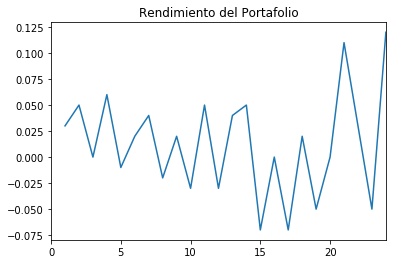

In [19]:
pasiva['Rend'].plot()
plt.title('Rendimiento del Portafolio')

# <font color= #6B6B6B> 4.1 Inversion Activa  </font>

Una inversión activa es un enfoque de inversión en el que el inversor o el gestor de carteras toman decisiones conscientes y activas sobre los valores en los que se invierte. Esto se contrasta con una inversión pasiva, en la que el inversor simplemente compra y mantiene un índice de mercado o una cartera diversificada de valores.

En una inversión activa, el inversor o el gestor de carteras pueden realizar una investigación exhaustiva y seleccionar valores específicos con el objetivo de generar rendimientos superiores a los del mercado. Además, pueden realizar ajustes periódicos en la cartera en función de cambios en el mercado o en la situación financiera personal.

Es importante tener en cuenta que la inversión activa conlleva un mayor riesgo y una mayor complejidad que la inversión pasiva, y que los resultados pueden variar ampliamente según la habilidad y la experiencia del inversor o el gestor de carteras. Por lo tanto, es importante evaluar cuidadosamente los factores que afectan la inversión activa antes de tomar una decisión.

In [6]:
#### ACTIVA
tickers_activa, pond_activa = dt.tickers_activa()

precios_activa = fn.precios_activa(
    fn.ticker_reformat(tickers_activa),
    start_date="2021-01-31",
    end_date="2022-01-31"
    )
# Para desarrollo de markowitz, exportar a csv
cash_t = ["SITESB.1","NMKA"]
precios_activa.to_csv("files/precios_activa.csv")

### Obteniendo ponderación del cash
temp = []
for t in cash_t:
    temp.append(pond_activa.loc[t][0])
cash_activa = pd.DataFrame(columns=["Ticker","Pond"])
cash_activa["Ticker"] = cash_t
cash_activa["Pond"] = temp
pond_activa.drop(cash_t,inplace = True)

## Obtención de los precios de los activos para evaluar la estrategia
precios_activa_estrategia = fn.precios_activa(
    fn.ticker_reformat(tickers_activa),
    start_date="2022-01-31",
    end_date="2023-01-31"
    )

[*********************100%***********************]  36 of 36 completed

2 Failed downloads:
- SITESB-1.MX: No data found, symbol may be delisted
- NMKA.MX: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  36 of 36 completed

2 Failed downloads:
- SITESB-1.MX: No data found, symbol may be delisted
- NMKA.MX: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [7]:
##### Obtención del portafolio Eficiente en Media Varianza (EMV), portafolio inicial
price_data = pd.read_csv("files/precios_activa.csv",index_col=0)
price_data = price_data.drop(columns=["SITESB-1.MX","NMKA.MX"])
price_data = price_data.replace(0,np.nan)
corr = price_data.corr()
annual_ret_sum =  fn.mean_var_generator(price_data)
rf = 0.0429/252
w, emv = fn.port_EMV(annual_ret_sum,corr,rf)

## Corrección de los tickers
precios_activa_estrategia = precios_activa_estrategia.drop(columns=["SITESB-1.MX","NMKA.MX"])
precios_activa_estrategia = precios_activa_estrategia.replace(0,np.nan)




In [15]:

#### Ejecución de la estrategia
inversion_activa,df_operaciones = fn.rebalanceo(precios_activa_estrategia,w,1e6,0.1/100)
inversion_activa,df_operaciones

ALSEA.MX           42.310001
ASURB.MX          417.670013
BOLSAA.MX          35.180000
ELEKTRA.MX       1355.380005
FEMSAUBD.MX       155.199997
GRUMAB.MX         269.799988
KOFUBL.MX         108.269997
LABB.MX            20.490000
LIVEPOLC-1.MX      94.489998
MEGACPO.MX         66.440002
PE&OLES.MX        220.990005
Q.MX              111.430000
MXN                20.829000
Name: 2022-01-31 00:00:00, dtype: float64
ALSEA.MX           52.887502
ASURB.MX         5966.714478
BOLSAA.MX           6.044674
ELEKTRA.MX       5213.000019
FEMSAUBD.MX      1034.666646
GRUMAB.MX         306.590895
KOFUBL.MX          75.187498
LABB.MX             5.097015
LIVEPOLC-1.MX      66.542252
MEGACPO.MX         27.341565
PE&OLES.MX        669.666683
Q.MX               46.819328
MXN                 0.260330
Name: 2022-01-31 00:00:00, dtype: float64
13470.818883649854


(     Portafolio  Rend  Acum
 0     999099.90   NaN   NaN
 1     999099.90   0.0   0.0
 2     999099.90   0.0   0.0
 3     999099.90   0.0   0.0
 4     999099.90   0.0   0.0
 5     999099.90   0.0   0.0
 6     999099.90   0.0   0.0
 7     999099.90   0.0   0.0
 8     999099.90   0.0   0.0
 9     999099.90   0.0   0.0
 10    999099.90   0.0   0.0
 11    999099.90   0.0   0.0
 12    999099.90   0.0   0.0
 13    999099.90   0.0   0.0
 14    999099.90   0.0   0.0
 15    999099.90   0.0   0.0
 16    999099.90   0.0   0.0
 17    999099.90   0.0   0.0
 18    999099.90   0.0   0.0
 19    999299.70   0.0   0.0
 20    999299.70   0.0   0.0
 21    999382.12   0.0   0.0
 22    999382.12   0.0   0.0
 23    999382.12   0.0   0.0
 24    999382.12   0.0   0.0
 25    999159.84  -0.0   0.0
 26    999159.84   0.0   0.0
 27    999295.14   0.0   0.0
 28    999069.87  -0.0  -0.0
 29    999069.87   0.0  -0.0
 ..          ...   ...   ...
 224   998865.97   0.0  -0.0
 225   998865.97   0.0  -0.0
 226   998865.

In [14]:
# Medidas de desempeño
desemp = fn.evaluacion_des(pasiva,inversion_activa,rf)
desemp

,Descripción,Pasiva,Activa
rend_m,Rendimiento promedio mensual,0.27,0.0
rend_c,Rendimiento mensual acumulado,6.93,0.0
Sharpe,Sharpe,0.34,-inf


# <font color= #6B6B6B> <font size = 6> 5. Conclusion </font>

<hr style="border:0.02in solid gray"> </hr>

Apesar de no poder observar los resultados de la inversión activa (anteriormente si nos corrio) pudimos concluir que para este ejercicio, la mejor inversión seria la activa porque tuvo mejores resultados. Además de la comparación de los rendimientos y el ratio de Sharpe, existen otros factores importantes a considerar antes de elegir una estrategia en particular. Aquí hay algunos aspectos a tener en cuenta:

- Volatilidad: La estrategia activa puede ser más volátil que la estrategia pasiva debido a su enfoque en la selección de valores y la toma de posiciones más agresivas. Es importante evaluar si la volatilidad adicional es aceptable en relación con los potenciales rendimientos adicionales.
- Costos: La estrategia activa puede requerir más tiempo y recursos para monitorear y ajustar la cartera, lo que puede resultar en costos adicionales en términos de comisiones, impuestos y otros costos indirectos.
- Flexibilidad: La estrategia activa puede ser menos flexible que la estrategia pasiva debido a su enfoque en la selección de valores y la toma de posiciones. Esto puede resultar en una menor capacidad para ajustar la cartera en función de cambios en el mercado o en la situación financiera personal.
- Fiabilidad: La estrategia activa depende de la habilidad y la experiencia del inversor o gestor de carteras para seleccionar valores y tomar posiciones. Si la estrategia no es llevada a cabo de manera adecuada, los resultados pueden ser inferiores a los de una estrategia pasiva.

Es importante evaluar cuidadosamente estos factores antes de elegir una estrategia en particular, ya que cada situación puede ser diferente y requerir un enfoque personalizado. La elección de una estrategia también puede depender de los objetivos personales de inversión, la situación financiera y la capacidad de tolerar el riesgo.


